In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
import tikzplotlib

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
table = pd.DataFrame()

# get the area between point and -point
for point in np.arange(0, 3.10, step = .01):
    
    single_dec = math.trunc(point * 10) / 10
    double = math.trunc(point * 100 + .0001) / 100  # +.0001 for float margin of error
    assert double >= single_dec
    hundreds = double - single_dec
    cdf_val = stats.norm.cdf(double) - stats.norm.cdf(-double)
    
    is_even = (10*single_dec % 2) == 0
    
    helper = ''
    if is_even:
        helper = r'\cellcolor{gray!20}'
    
    table.loc[str(single_dec), str('{:+.2f}'.format(hundreds))] = helper + '{:.4f}'.format(cdf_val)
    
assert table.isnull().sum().sum() == 0

In [3]:
#print(table.to_latex(escape = False))
s = table.style.to_latex(hrules = True)

In [4]:
wd = os.getcwd().rstrip("/python")

%cd ~

/Users/alclark


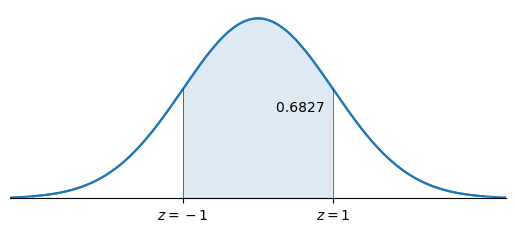

In [10]:
# Add illustration

x = np.linspace(-3,3, 1000)
fig, ax = plt.subplots()
y = stats.norm.pdf(x)
ax.plot(x, y)
ax.set_aspect(6)

for spine in 'left', 'right', 'top':
    ax.spines[spine].set_visible(False)
ax.set_yticks([])
ylim = ax.get_ylim()
xlim = ax.get_xlim()

z_score = 1
x_vals = x[(x<z_score) & (x>-z_score)]
y_vals = y[y > stats.norm.pdf(z_score)]
ax.fill_between(x_vals, y_vals, alpha = 0.15)

x = np.linspace(-4,4, 2000)
y = stats.norm.pdf(x)
ax.plot(x, y, color = 'C0')

ax.set_ylim(0, ylim[1])
ax.set_xlim(xlim)

# annotate area

ax.text(1, stats.norm.pdf(1)/1.2,
        s = '{:.4f}  '.format(stats.norm.cdf(z_score) - stats.norm.cdf(-z_score)),
        ha = 'right',
        va = 'center')

ax.set_xticks([-z_score, z_score])
ax.set_xticklabels(['$z=-1$', '$z=1$'])

ax.plot([z_score,z_score], [0, stats.norm.pdf(z_score)], color = 'black', ls = '-', lw = 0.4)
ax.plot([-z_score,-z_score], [0, stats.norm.pdf(-z_score)], color = 'black', ls = '-', lw = 0.4)
#ax.plot([1], [stats.norm.pdf(1)], color = 'black', marker = '.')

#tikz_plot_beta = tikzplotlib.get_tikz_code()
tikzplotlib.save('testplot.tex')

#print(s)
#plt.savefig('ztable_plot.pdf')
#plt.show()

In [18]:
tikz_plot = r"""
\begin{tikzpicture}
    \begin{axis}[
        no markers, 
        domain=-3:3, 
        samples=100,
        axis lines=left,
        height=6cm, width=10cm,
        xtick={-1, 1},
        xticklabels={$-1$, $z=1$},
        ytick=\empty,
        x axis line style={-},
        y axis line style={-},
        axis y line=none, % Remove the left y-axis spine
        xlabel near ticks,
        ylabel near ticks,
        ymin=0,
        ymax = 0.43
    ]
    
    \addplot [fill=blue!30, draw=none, domain=-1:1] {1/sqrt(2*pi)*exp(-x^2/2)} \closedcycle;
    \addplot [thick] {1/sqrt(2*pi)*exp(-x^2/2)};
    
    \node at (axis cs:0,0.2) {$0.6827$};
        
    \end{axis}
\end{tikzpicture}
"""

In [19]:
#with open("ztable-interior-input.tex", 'w') as f:
#    f.write(s)
    
with open("ztable-interior.tex", 'w') as f:
    doc = r"""\documentclass{article}
\usepackage[utf8]{inputenc}
\usepackage[margin=1in]{geometry}
\usepackage{booktabs}
\usepackage{colortbl}
\usepackage{graphicx}
\usepackage{xcolor}
\usepackage{tikz}
\usepackage{pgfplots}
\begin{document}
\begin{center}
\section*{$z$-table (FPP style)}
%\input{ztable-input.tex}
""" + s + r"""
\bigskip
""" + tikz_plot + r"""
\end{center}
\end{document}
"""
    f.write(doc)

os.system("pdflatex ztable-interior.tex")
os.system("open ztable-interior.tex")
os.system(f"mv ztable-interior.tex {wd}/ztable-interior.tex")
os.system(f"mv ztable-interior.pdf {wd}/ztable-interior.pdf")

files = !ls
for f in files:
    if f.startswith("ztable."):
        os.system(f"rm {f}")
        #print(f)

This is pdfTeX, Version 3.141592653-2.6-1.40.24 (TeX Live 2022) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./ztable-interior.tex
LaTeX2e <2021-11-15> patch level 1
L3 programming layer <2022-02-24>
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/article.cls
Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2022/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2022/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2022/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2022/texmf-dist/tex/latex/booktabs/booktabs.sty)
(/usr/local/texlive/2022/texmf-dist/tex/latex/colortbl/colortbl.sty
(/usr/local/texlive/2022/texmf-dist/tex/latex/tools/array.sty)
(/usr/local/texlive/2022/texmf-di

g.code.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgfplots/pgfplots.errorbars.cod
e.tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgfplots/pgfplots.markers.code.
tex)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgfplots/pgfplotsticks.code.tex
)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgfplots/pgfplots.paths.code.te
x)
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/frontendlayer/tikz/librarie
s/tikzlibrarydecorations.code.tex
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/modules/pgfmoduledecoration
s.code.tex))
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/frontendlayer/tikz/librarie
s/tikzlibrarydecorations.pathmorphing.code.tex
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/libraries/decorations/pgfli
brarydecorations.pathmorphing.code.tex))
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/frontendlayer/tikz/librarie
s/tikzlibrarydecorations.pathreplacing.code.tex
(/usr/local/texlive/2022/texmf-dist/tex/generic/pgf/libraries/decora